In [4]:
import numpy as np 
import scanpy as sc 
import pandas as pd 
import matplotlib.pyplot as plt 
import scanpy.external as sce

# Description 

This notebook is used to generate the cell type annotation based on gene activity data

In [5]:
scdata = sc.read_h5ad('gadata_harmony_1.h5ad')
scdata

/home/sunrui/anaconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 337691 × 3000
    obs: 'species', 'samples', 'tissues', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'species_colors', 'tissues_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

/home/sunrui/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/sunrui/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


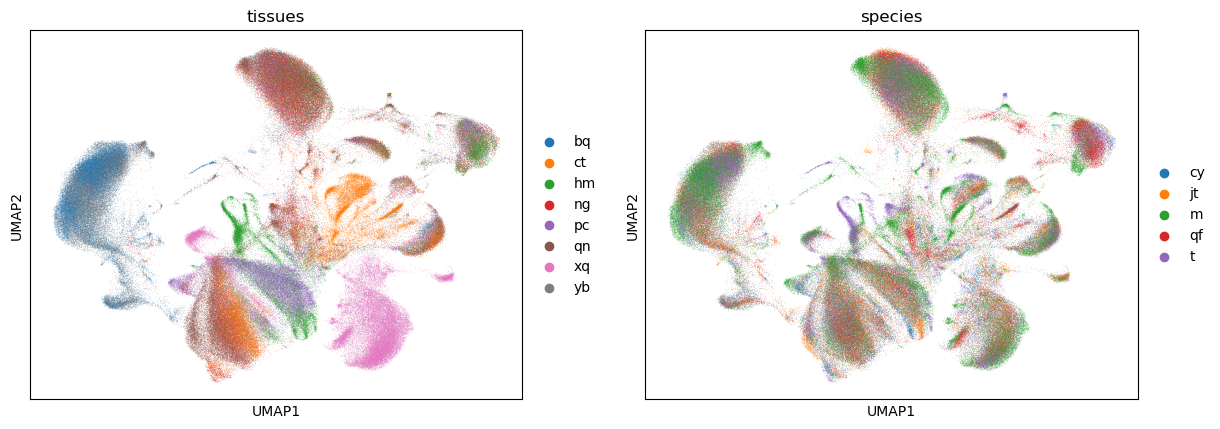

In [6]:
sc.pl.umap(scdata, color = ['tissues', 'species'])

## clustering

/home/sunrui/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


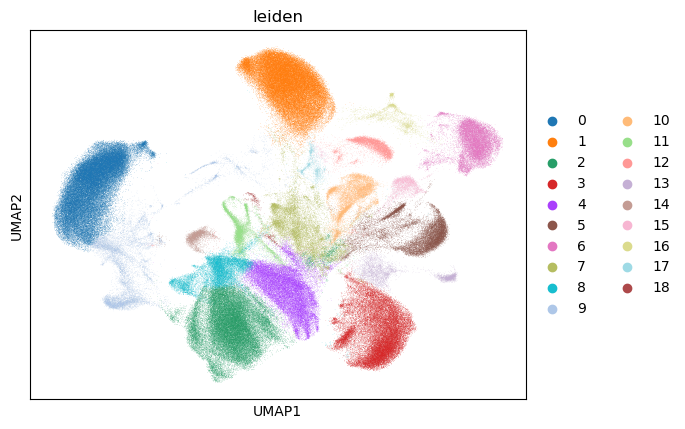

In [22]:
sc.tl.leiden(scdata, resolution = 0.4)
sc.pl.umap(scdata, color = 'leiden')

## annotation based on marger gene

/home/sunrui/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


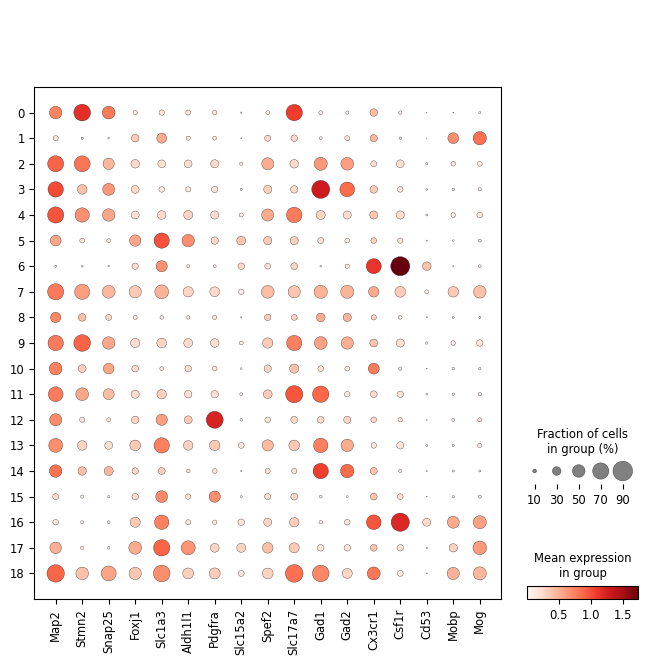

In [48]:
marker_list = ['Map2','Stmn2','Snap25','Foxj1','Slc1a3','Aldh1l1','Pdgfra','Slc15a2','Spef2','Slc17a7','Gad1', 'Gad2','Cx3cr1', 'Csf1r', 'Cd53','Mobp', 'Mog']
sc.pl.dotplot(scdata, var_names = marker_list, groupby = 'leiden')

/home/sunrui/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


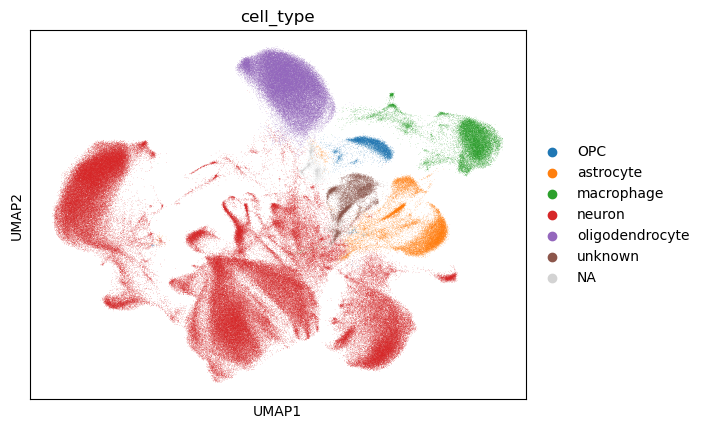

In [44]:
cell_anno = {
    'neuron': [0,2,3,4,7,8,9,11,13,14,18],
    'OPC': [12],
    'macrophage':[6,16],
    'oligodendrocyte': [1],
    'astrocyte':[5,15],
    'unknown': [10]
}

leiden_dic = {}
for ele in cell_anno:
    tmp = cell_anno[ele]
    for _ in tmp:
        leiden_dic[str(_)] = ele

scdata.obs.loc[:,'cell_type'] = scdata.obs.leiden.map(leiden_dic)
sc.pl.umap(scdata, color = 'cell_type')

In [58]:
scdata.write_h5ad('gadata_anno.h5ad')

In [ ]:
import anndata as ad 

sub_data = scdata.raw[:,marker_list]
X = sub_data.X
obs = scdata.obs.copy()
var = sub_data.var.copy()

plotdata = ad.AnnData(X, obs, var)
plotdata.obsm['X_umap'] = scdata.obsm['X_umap'].copy()
plotdata.write('ga_plot.h5ad')